# KNN
K Nearest Neighbors(k-최근접 이웃 분류 알고리즘)

k-최근접 이웃 분류 알고리즘

가장 고전적이고 직관적인 머신러닝 분류 알고리즘

기하학적 거리 분류기

가장 가깝게 위치하는 멤버로 분류하는 방식

In [1]:
from IPython.display import Image

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
Image(url='https://miro.medium.com/max/405/0*QyWp7J6eSz0tayc0.png', width=500)

분류

/var/folders/xn/w4kqb1715fz7h49tp_h7hbmr0000gn/T/ipykernel_65621/1968757278.py:22: MatplotlibDeprecationWarning: Passing the marker parameter of scatter() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  axes[i//3, i%3].scatter(red[:,0], red[:, 1], 80, 'r', '^')
/var/folders/xn/w4kqb1715fz7h49tp_h7hbmr0000gn/T/ipykernel_65621/1968757278.py:23: MatplotlibDeprecationWarning: Passing the marker parameter of scatter() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  axes[i//3, i%3].scatter(blue[:,0], blue[:, 1], 80, 'b', '^')
/var/folders/xn/w4kqb1715fz7h49tp_h7hbmr0000gn/T/ipykernel_65621/1968757278.py:24: MatplotlibDeprecationWarning: Passing the marker parameter of scatter() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  axes[i//3, i%3].scatter(newcomer[:, 0], newcomer[:, 1], 80, 'g', 'o')
/var/folders/xn/w4kqb1715fz7h49tp_h7hbmr0000g

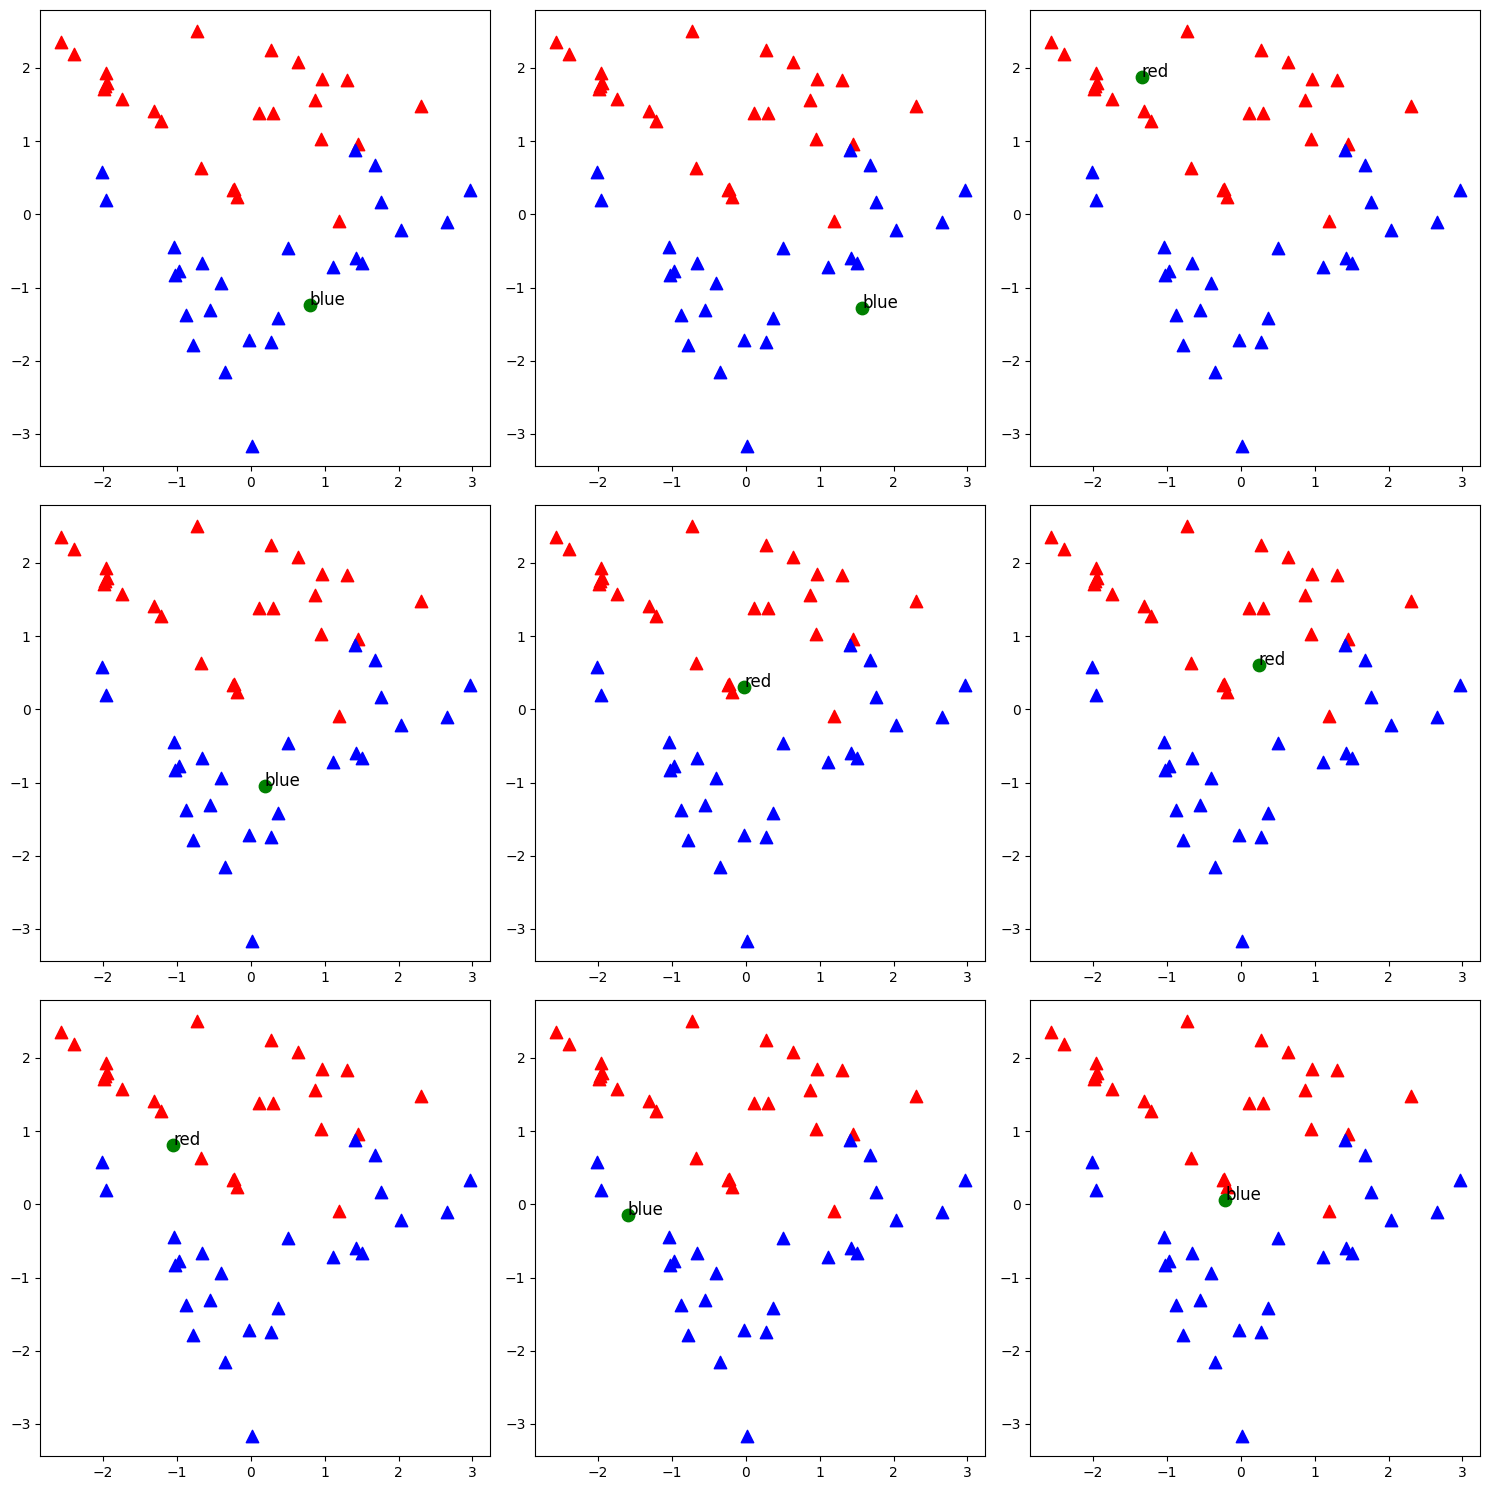

In [4]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 3)
fig.set_size_inches(15, 15)

for i in range(9):
    # 더미 데이터 생성
    X, y = make_classification(n_samples=50, n_features=2, n_informative=2, n_redundant=0, random_state=30)

    blue = X[y==0]
    red = X[y==1]

    # 랜덤한 새로운 점 생성
    newcomer = np.random.randn(1, 2)

    # K
    K = 3*(i//3+1)

    axes[i//3, i%3].scatter(red[:,0], red[:, 1], 80, 'r', '^')
    axes[i//3, i%3].scatter(blue[:,0], blue[:, 1], 80, 'b', '^')
    axes[i//3, i%3].scatter(newcomer[:, 0], newcomer[:, 1], 80, 'g', 'o')

    # n_neighbors=3
    knn = KNeighborsClassifier(n_neighbors=3*(i//3+1))
    knn.fit(X, y)
    pred = knn.predict(newcomer)

    # 표기
    axes[i//3, i%3].annotate('red' if pred==1 else 'blue', xy=newcomer[0], xytext=(newcomer[0]), fontsize=12)

plt.tight_layout()
plt.show()

KNN 예제


In [5]:
# 1) 라이브러리 로드
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# 2) 데이터 로딩 및 분할
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.2, random_state=42, stratify=digits.target
)

# 3) 모델 학습
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# 4) 예측 및 평가
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9833333333333333

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.95      1.00      0.97        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       0.97      1.00      0.99        36
           5       1.00      1.00      1.00        37
           6       1.00      0.97      0.99        36
           7       0.97      1.00      0.99        36
           8       0.94      0.91      0.93        35
           9       1.00      0.94      0.97        36

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



# 숫자 분류

In [14]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X = mnist.data.astype(np.float32) / 255.0
y = mnist.target.astype(int)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=10000, test_size=10000,
    random_state=42, stratify=y
)


In [15]:
knn = KNeighborsClassifier(n_neighbors=3, weights='distance', p=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"■ Accuracy: {acc:.4f}")


■ Accuracy: 0.9488


In [16]:
# 6)평가
classes   = [str(i) for i in range(10)]
acc = accuracy_score(y_test, y_pred)
print(f"■ Accuracy: {acc:.4f}\n")
print("■ Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=classes))

■ Accuracy: 0.9488

■ Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       986
           1       0.93      0.99      0.96      1125
           2       0.97      0.94      0.95       999
           3       0.93      0.93      0.93      1020
           4       0.95      0.94      0.95       975
           5       0.93      0.93      0.93       902
           6       0.97      0.98      0.97       982
           7       0.94      0.95      0.95      1042
           8       0.98      0.88      0.93       975
           9       0.92      0.95      0.93       994

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



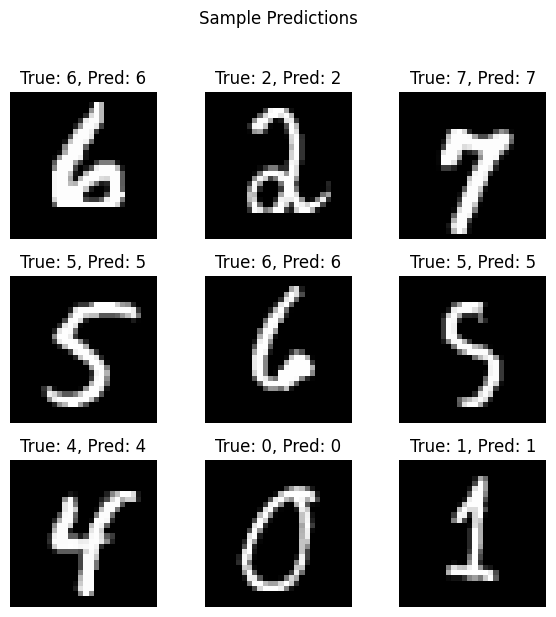

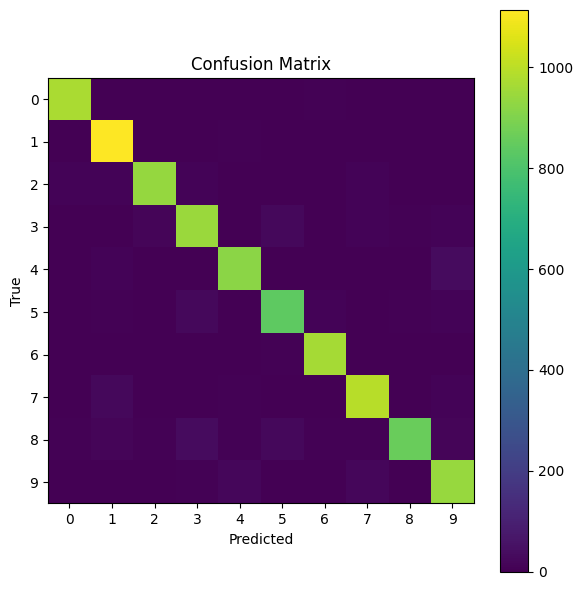

In [8]:
# 샘플 예측 이미지
fig, axes = plt.subplots(3, 3, figsize=(6, 6))
indices = np.random.choice(len(X_test), 9, replace=False)
for ax, idx in zip(axes.ravel(), indices):
    ax.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    ax.set_title(f"True: {y_test[idx]}, Pred: {y_pred[idx]}")
    ax.axis('off')
plt.suptitle('Sample Predictions', y=1.02)
plt.tight_layout()
plt.show()

# 행렬 히트맵
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
ticks = np.arange(10)
plt.xticks(ticks, ticks)
plt.yticks(ticks, ticks)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()


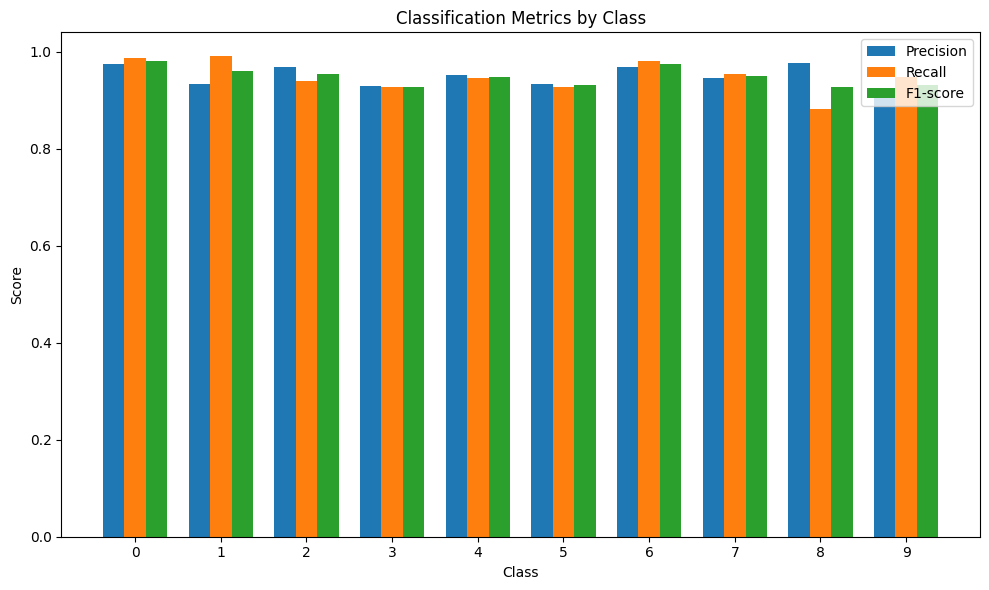

In [9]:
report = classification_report(y_test, y_pred, output_dict=True)
precision = [report[str(i)]['precision'] for i in range(10)]
recall    = [report[str(i)]['recall']    for i in range(10)]
f1        = [report[str(i)]['f1-score']  for i in range(10)]
classes   = [str(i) for i in range(10)]
x = np.arange(len(classes))
width = 0.25

plt.figure(figsize=(10, 6))
plt.bar(x - width, precision, width, label='Precision')
plt.bar(x,      recall,    width, label='Recall')
plt.bar(x + width, f1,       width, label='F1-score')
plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Classification Metrics by Class')
plt.xticks(x, classes)
plt.legend()
plt.tight_layout()
plt.show()


# 의류분류


fashion 객체의 키: dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])
■ Accuracy: 0.8247

■ Classification Report:

              precision    recall  f1-score   support

 T-shirt/top       0.77      0.82      0.79      1000
     Trouser       0.99      0.96      0.98      1000
    Pullover       0.72      0.70      0.71      1000
       Dress       0.85      0.85      0.85      1000
        Coat       0.70      0.72      0.71      1000
      Sandal       0.99      0.80      0.88      1000
       Shirt       0.57      0.58      0.58      1000
     Sneaker       0.85      0.94      0.89      1000
         Bag       0.97      0.93      0.95      1000
  Ankle boot       0.88      0.94      0.91      1000

    accuracy                           0.82     10000
   macro avg       0.83      0.82      0.83     10000
weighted avg       0.83      0.82      0.83     10000



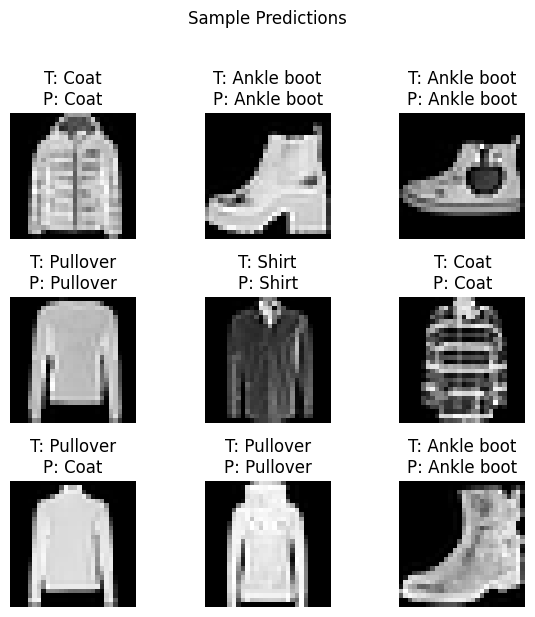

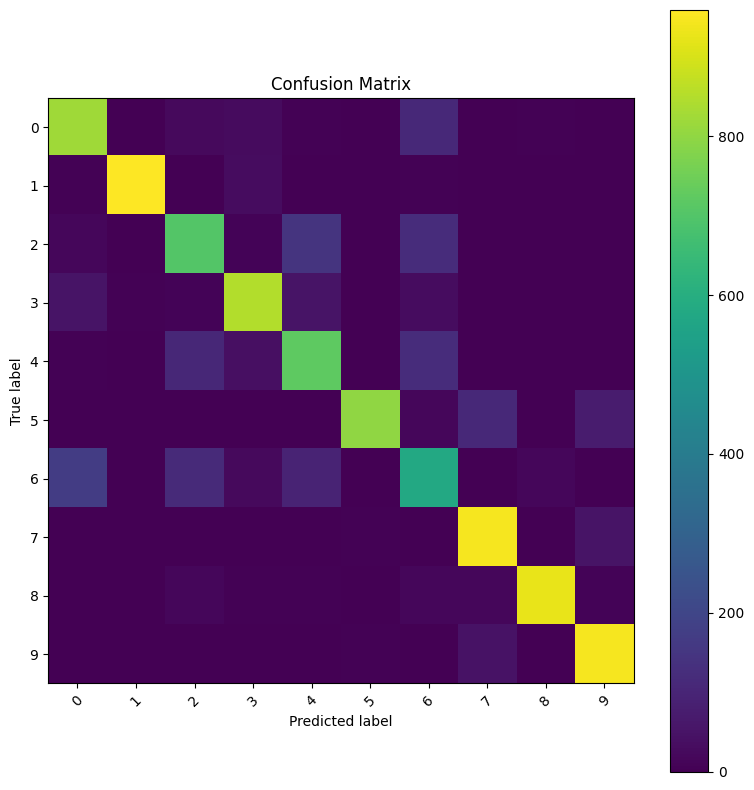

In [ ]:
# Fashion MNIST KNN 분류 예제

# 1) 라이브러리 로드
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# 2) Fashion MNIST 데이터 불러오기 & 정규화
fashion = fetch_openml('Fashion-MNIST', version=1, as_frame=False)
X = fashion.data.astype(np.float32) / 255.0
y = fashion.target.astype(int)

# print(fashion.target_names)
print(f"\nfashion 객체의 키: {fashion.keys()}")
# 라벨 이름 매핑
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

# 3) 학습/테스트 분할 (각 10,000개 샘플)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=10000, test_size=10000,
    random_state=42, stratify=y
)

# 4) 특성 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# 5) KNN 모델 학습
knn = KNeighborsClassifier(n_neighbors=5, weights='distance', p=2)
knn.fit(X_train_scaled, y_train)

# 6) 예측 및 평가
y_pred = knn.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
print(f"■ Accuracy: {acc:.4f}\n")
print("■ Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=class_names))

# 7) 샘플 이미지 예측 결과 시각화
fig, axes = plt.subplots(3, 3, figsize=(6, 6))
indices = np.random.choice(len(X_test), 9, replace=False)
for ax, idx in zip(axes.ravel(), indices):
    ax.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    ax.set_title(f"T: {class_names[y_test[idx]]}\nP: {class_names[y_pred[idx]]}")
    ax.axis('off')
plt.suptitle('Sample Predictions', y=1.02)
plt.tight_layout()
plt.show()

# 8) 혼동 행렬 히트맵
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
ticks = np.arange(len(class_names))
plt.xticks(ticks, ticks, rotation=45)
plt.yticks(ticks, ticks)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()


In [27]:
print(fashion['details'])
print(fashion['DESCR'])



{'id': '40996', 'name': 'Fashion-MNIST', 'version': '1', 'description_version': '1', 'format': 'ARFF', 'creator': ['Han Xiao', 'Kashif Rasul', 'Roland Vollgraf'], 'upload_date': '2017-12-20T13:28:27', 'licence': 'Public', 'url': 'https://api.openml.org/data/v1/download/18238735/Fashion-MNIST.arff', 'parquet_url': 'https://data.openml.org/datasets/0004/40996/dataset_40996.pq', 'file_id': '18238735', 'default_target_attribute': 'class', 'version_label': '1.0', 'citation': '@online{xiao2017/online,\n  author       = {Han Xiao and Kashif Rasul and Roland Vollgraf},\n  title        = {Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms},\n  date         = {2017-08-28},\n  year         = {2017},\n  eprintclass  = {cs.LG},\n  eprinttype   = {arXiv},\n  eprint       = {cs.LG/1708.07747},\n}', 'tag': ['Artificial Intelligence', 'Computer Vision', 'Data Sets', 'Machine Learning', 'OpenML-CC18', 'study_218', 'study_99', 'vision'], 'visibility': 'public', 'original_da